This jupyter notebook compare gensim Word2Vec implementation with the self-build TensorFlow Word2Vec model by a simple example.

# 1. Directly Use Word2ec model in gensim

Here we choose the skip-gram model.

# step 1: pre-process

In [7]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# set the corpus, divide it into sentences.
corpus_raw = 'He is the king . The king is royal . She is the royal queen . She is the queen '

# convert to lower case
corpus_raw = corpus_raw.lower()
print(corpus_raw)

he is the king . the king is royal . she is the royal queen . she is the queen 


In [9]:
# sentences list for training model
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen'], ['she', 'is', 'the', 'queen']]


In [12]:
# remove . and split the sentence
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
        
# create word2int an int2word dictionaries
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print("words: ", words)
print("word2int: ", word2int)
print("int2word: ", int2word)

words:  {'royal', 'she', 'is', 'queen', 'king', 'he', 'the'}
word2int:  {'royal': 0, 'she': 1, 'is': 2, 'queen': 3, 'king': 4, 'he': 5, 'the': 6}
int2word:  {0: 'royal', 1: 'she', 2: 'is', 3: 'queen', 4: 'king', 5: 'he', 6: 'the'}


# step 2: train the model

In [3]:
# use the corpus to train a word2vec model
model = Word2Vec(sentences, window=2, min_count=1, size=5, sg=1)

# step 3: find the closest word / visualization

In [13]:
# define the utility functions
# calculate the euclidean distance
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

# find the closest embedding
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [24]:
# create an array to save all the word embeddings
import numpy as np
vectors = np.empty((0,5), int)
for i in word2int:
    v = model.wv[i].reshape(1,5)
    vectors = np.append(vectors, v, axis=0)
print(vectors)

[[-0.04108642 -0.08220293 -0.08155387 -0.06814617  0.08490859]
 [-0.09877158 -0.06708763  0.03907226 -0.03416926 -0.04674773]
 [ 0.01337672  0.04916007 -0.00382072  0.06348719 -0.05318097]
 [-0.07780853 -0.01206629  0.02227198 -0.09675884 -0.03171881]
 [-0.03523685 -0.03847206  0.05936517  0.01271019 -0.01490353]
 [-0.02868939  0.0151211  -0.08545563 -0.07397427  0.02091852]
 [-0.02190888  0.07080114  0.03469391 -0.03839784  0.08377661]]


In [20]:
# predict the closest word
input_word = "king"
word_index = word2int[input_word]
output_word = int2word[find_closest(word_index, vectors)]
print("the closest word to", input_word, "is:", output_word)

the closest word to king is: she


In [21]:
# use PCA to get the decomposition of the word embeddings

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=2)
pca.fit(vectors)
vectors = pca.transform(vectors)

{'royal', 'she', 'is', 'queen', 'king', 'he', 'the'}


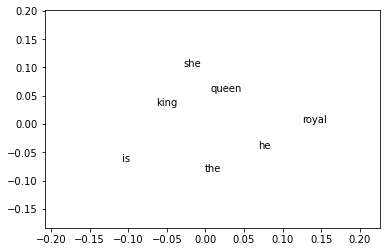

In [22]:
# plot the word embeddings
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
print(words)
for word in words:
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-0.1, max([vectors[word2int[w]][0] for w in words])+0.1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-0.1, max([vectors[word2int[w]][1] for w in words])+0.1)
plt.show()

# 2. build Word2Vec step by step in TF

## step 1: data pre-processing

In [ ]:
import tensorflow as tf
import numpy as np

In [1]:
# define a corpus
corpus_raw = 'He is the king . The king is royal . She is the royal queen . She is the queen '

# convert to lower case
corpus_raw = corpus_raw.lower()
print(corpus_raw)

he is the king . the king is royal . she is the royal queen . she is the queen 


In [2]:
# remove . and split the sentence
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
print(words)

['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen', 'she', 'is', 'the', 'queen']


In [3]:
# create word2int an int2word dictionaries
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
print(word2int)
print(int2word)

{'is': 0, 'he': 1, 'royal': 2, 'the': 3, 'she': 4, 'king': 5, 'queen': 6}
{0: 'is', 1: 'he', 2: 'royal', 3: 'the', 4: 'she', 5: 'king', 6: 'queen'}


In [4]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen'], ['she', 'is', 'the', 'queen']]


In [5]:
# prepare word-neighborWord pair
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'queen'], ['the', 'she'], ['the', 'is'], ['the', 'queen'], ['queen', 'is'], ['queen', 'the']]


In [6]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [9]:
# prepare training data
x_train = [] # input word
y_train = [] # output word (neighbor word)

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print("x_train")
print(x_train)
print("y_train")
print(y_train)

x_train
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 

## step 2: define the Word2Vec model

In [10]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) # sometimes we don't have bias here
hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# initialize the session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) # make sure you do this!

# define the loss function (actually the newest Word2Vec model is using more efficient loss function)
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

# define training iterations/epochs
n_iters = 2000

# train for n_iter iterations
for n in range(n_iters):
    _, loss = sess.run([train_step, cross_entropy_loss], feed_dict={x: x_train, y_label: y_train})
    if n % 1000 == 0:
        print('epoch:', n, 'loss is:', loss)

epoch: 0 loss is: 5.02179
epoch: 1000 loss is: 1.3840604


In [21]:
# get the embeddings of all the words
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.43957722 -0.02169335  0.99495244  0.7440139   0.30535778]
 [ 0.93303806  2.5875502  -1.2420619  -0.61183727  1.3030291 ]
 [ 0.9251915   0.18413424  0.05256362 -2.085824   -0.70353365]
 [-0.7467028   0.25536013 -0.2696684   0.745507   -2.1591544 ]
 [ 1.9636409   1.880081   -0.40516308  0.41972914 -0.5456779 ]
 [ 0.01716292  3.944802    0.6797297  -0.4324559  -0.28972468]
 [-0.16922033  2.72589     0.445101   -0.23763134 -0.03180511]]


In [22]:
# calculate the euclidean distance
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

# find the closest embedding
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [23]:
# predict the closest word
input_word = "king"
word_index = word2int[input_word]
output_word = int2word[find_closest(word_index, vectors)]
print("the closest word to", input_word, "is:", output_word)

the closest word to king is: queen


## step 3: visulization of the embeddings

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=2)
pca.fit(vectors)
vectors = pca.transform(vectors)

{'is', 'he', 'royal', 'the', 'she', 'king', 'queen'}


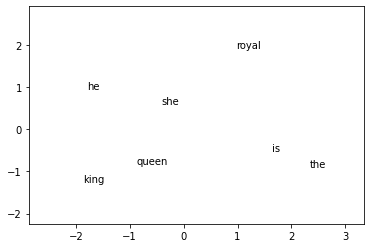

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
print(words)
for word in words:
#     print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()